In [1]:
import json
import pandas as pd
from pathlib import Path

root_dir = Path("data")

# Folders you care about
target_folders = ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024"]

records = []

for folder in target_folders:
    folder_path = root_dir / folder

    print(f"📂 Scanning: {folder_path}")

    # Loop through all json files in the folder
    for json_file in folder_path.glob("*.json"):

        # Read JSON
        try:
            with open(json_file, "r") as f:
                data = json.load(f)
        except Exception as e:
            print(f"⚠️ Failed to read {json_file}: {e}")
            continue


        records.append(data)

# Create dataframe
df = pd.DataFrame(records)
df.head()

📂 Scanning: data/2012
📂 Scanning: data/2013
📂 Scanning: data/2014
📂 Scanning: data/2015
📂 Scanning: data/2016
📂 Scanning: data/2017
📂 Scanning: data/2018
📂 Scanning: data/2019
📂 Scanning: data/2020
📂 Scanning: data/2021
📂 Scanning: data/2022
📂 Scanning: data/2023
📂 Scanning: data/2024


,arxiv_id,title,authors,abstract,published_date,last_revised_date,num_revisions,pdf_url,primary_category,categories,...,citing_spaces,citing_collections,citations_by_year,citationCount,venue,citations,referenceCount,references,influentialCitationCount,embedding
0,1212.2518,Efficient Inference in Large Discrete Domains,"[{'name': 'R Sharma', 'citations_all': None, '...",In this paper we examine the problem of infere...,2012-10-19T00:00:00,2012-10-19T00:00:00,0,https://arxiv.org/pdf/1212.2518.pdf,Artificial Intelligence (cs.AI),[Artificial Intelligence (cs.AI)],...,0,0,"{'2003': 1, '2005': 1, '2006': 1, '2007': 1, '...",11.0,{'name': 'Conference on Uncertainty in Artific...,"[{'arxiv_id': None, 'referenceCount': 26, 'cit...",13,"[{'arxiv_id': None, 'referenceCount': 9, 'cita...",1,None
1,1212.2511,Stochastic complexity of Bayesian networks,"[{'name': 'K Yamazaki', 'citations_all': 708, ...",Bayesian networks are now being used in enormo...,2012-10-19T00:00:00,2012-10-19T00:00:00,0,https://arxiv.org/pdf/1212.2511.pdf,Machine Learning (cs.LG),"[Machine Learning (cs.LG), Machine Learning (s...",...,0,0,"{'2003': 2, '2004': 5, '2005': 6, '2006': 5, '...",45.0,{'name': 'Conference on Uncertainty in Artific...,"[{'arxiv_id': None, 'referenceCount': 75, 'cit...",13,"[{'arxiv_id': None, 'referenceCount': 22, 'cit...",2,None
2,1211.5625,A survey of computational methods for protein ...,"[{'name': 'S Srihari', 'citations_all': 3135, ...",Complexes of physically interacting proteins a...,2012-11-24T00:00:00,2012-11-24T00:00:00,0,https://arxiv.org/pdf/1211.5625.pdf,"Computational Engineering, Finance, and Scienc...","[Computational Engineering, Finance, and Scien...",...,0,0,"{'2013': 8, '2014': 11, '2015': 16, '2016': 14...",127.0,"{'name': None, 'type': None, 'ranking': None}","[{'arxiv_id': None, 'referenceCount': 91, 'cit...",77,"[{'arxiv_id': None, 'referenceCount': 27, 'cit...",4,None
3,1212.2480,Approximate Inference and Constrained Optimiza...,"[{'name': 'T Heskes', 'citations_all': 16337, ...",Loopy and generalized belief propagation are p...,2012-10-19T00:00:00,2012-10-19T00:00:00,0,https://arxiv.org/pdf/1212.2480.pdf,Machine Learning (cs.LG),"[Machine Learning (cs.LG), Artificial Intellig...",...,0,0,"{'2003': 3, '2004': 6, '2005': 8, '2006': 10, ...",143.0,{'name': 'Conference on Uncertainty in Artific...,"[{'arxiv_id': None, 'referenceCount': 77, 'cit...",13,"[{'arxiv_id': None, 'referenceCount': 69, 'cit...",13,None
4,1212.4674,Natural Language Understanding Based on Semant...,"[{'name': 'H Kong', 'citations_all': None, 'ci...","In this paper, we define event expression over...",2012-12-19T00:00:00,2012-12-19T00:00:00,0,https://arxiv.org/pdf/1212.4674.pdf,Computation and Language (cs.CL),[Computation and Language (cs.CL)],...,0,0,{},0.0,"{'name': 'arXiv.org', 'type': None, 'ranking':...",[],5,"[{'arxiv_id': None, 'referenceCount': None, 'c...",0,None


In [2]:
df.columns

Index(['arxiv_id', 'title', 'authors', 'abstract', 'published_date',
       'last_revised_date', 'num_revisions', 'pdf_url', 'primary_category',
       'categories', 'keywords', 'num_pages', 'github_stars', 'upvote',
       'citing_models', 'citing_datasets', 'citing_spaces',
       'citing_collections', 'citations_by_year', 'citationCount', 'venue',
       'citations', 'referenceCount', 'references', 'influentialCitationCount',
       'embedding'],
      dtype='object')

In [3]:
venue_df = pd.json_normalize(df['venue'],
                             sep='.')
df = pd.concat([df, venue_df], axis=1)
df.drop(columns=['venue'], inplace=True)
df.rename(columns={'name': 'venue_name',
                   'type': 'venue_type',
                   'ranking': 'venue_ranking'},
          inplace=True)

In [4]:
df.drop(columns=['pdf_url', 'embedding', 'venue_name'], inplace=True)

In [5]:
df.columns

Index(['arxiv_id', 'title', 'authors', 'abstract', 'published_date',
       'last_revised_date', 'num_revisions', 'primary_category', 'categories',
       'keywords', 'num_pages', 'github_stars', 'upvote', 'citing_models',
       'citing_datasets', 'citing_spaces', 'citing_collections',
       'citations_by_year', 'citationCount', 'citations', 'referenceCount',
       'references', 'influentialCitationCount', 'venue_type',
       'venue_ranking'],
      dtype='object')

In [6]:
import re
def normalize_category(cat):
    match = re.search(r'\((.*?)\)', cat)
    return match.group(1) if match else cat.strip()

df['categories'] = df['categories'].apply(lambda lst: [normalize_category(c) for c in lst])
df['primary_category'] = df['primary_category'].apply(normalize_category)

In [7]:
df.head(1)

,arxiv_id,title,authors,abstract,published_date,last_revised_date,num_revisions,primary_category,categories,keywords,...,citing_spaces,citing_collections,citations_by_year,citationCount,citations,referenceCount,references,influentialCitationCount,venue_type,venue_ranking
0,1212.2518,Efficient Inference in Large Discrete Domains,"[{'name': 'R Sharma', 'citations_all': None, '...",In this paper we examine the problem of infere...,2012-10-19T00:00:00,2012-10-19T00:00:00,0,cs.AI,[cs.AI],None,...,0,0,"{'2003': 1, '2005': 1, '2006': 1, '2007': 1, '...",11.0,"[{'arxiv_id': None, 'referenceCount': 26, 'cit...",13,"[{'arxiv_id': None, 'referenceCount': 9, 'cita...",1,conference,A


In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df.describe()

,num_revisions,num_pages,github_stars,upvote,citing_models,citing_datasets,citing_spaces,citing_collections,citationCount,referenceCount,influentialCitationCount
count,15637.000000,15595.000000,44.000000,15637.000000,15637.000000,15637.000000,15637.000000,15637.000000,15622.000000,15637.000000,15637.000000
mean,0.052951,16.098365,308.977273,0.080386,0.050713,0.009529,0.134425,0.032871,69.475931,34.482957,5.022255
std,0.242851,19.796485,1260.472124,2.122736,2.829182,0.279968,10.945087,0.991235,2389.825212,30.548923,246.095093
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,17.000000,0.000000
50%,0.000000,12.000000,10.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,29.000000,0.000000
75%,0.000000,18.000000,101.750000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,44.000000,1.000000
max,4.000000,868.000000,8320.000000,188.000000,299.000000,14.000000,1315.000000,108.000000,291791.000000,640.000000,30383.000000


### Distribution of citationCount is right-skewed -> log-transform

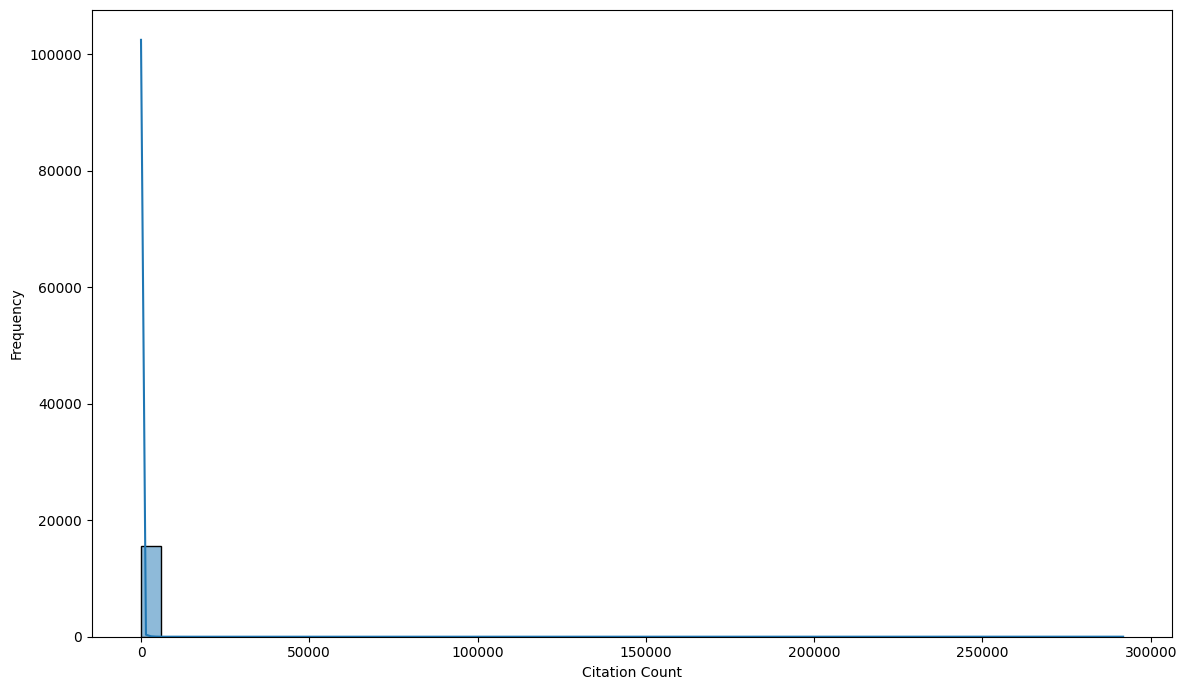

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 7))

citation_counts = df['citationCount']

# 1️⃣ Linear scale
# plt.subplot(1, 2, 1)
sns.histplot(citation_counts, bins=50, kde=True)
# plt.title("Distribution of Citation Count (Linear Scale)")
plt.xlabel("Citation Count")
plt.ylabel("Frequency")

# 2️⃣ Log scale (better for skewed data)
# plt.subplot(1, 2, 2)
# sns.histplot(np.log1p(citation_counts), bins=50, kde=True, color='orange')
# plt.title("Distribution of Citation Count (Log Scale)")
# plt.xlabel("log(1 + Citation Count)")
# plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### Check missing values

In [10]:
df.isna().sum().reset_index(name='missing_count').sort_values(by='missing_count', ascending=False)

,index,missing_count
11,github_stars,15593
9,keywords,15362
24,venue_ranking,10386
23,venue_type,9171
10,num_pages,42
17,citations_by_year,15
18,citationCount,15
1,title,0
0,arxiv_id,0
8,categories,0


### Drop keywords

In [11]:
df.drop(columns='keywords', inplace=True)

### Remove paper with num_pages = null

In [12]:
df = df[df['num_pages'].notna()]

### Remove paper with citations_by_year and citationCount = null

In [13]:
df = df[df['citations_by_year'].notna()]
df = df[df['citationCount'].notna()]

### Fill missing values in github_stars = 0

In [14]:
df.loc[df['github_stars'].isna(), 'github_stars'] = 0

### Fill missing (venue.type, venue.ranking) = (preprint, 0)

In [15]:
df.loc[df['venue_type'].isna(), 'venue_type'] = 'preprint'
df.loc[df['venue_ranking'].isna(), 'venue_ranking'] = 0

In [16]:
df.isna().sum().reset_index(name='missing_count').sort_values(by='missing_count', ascending=False)

,index,missing_count
0,arxiv_id,0
1,title,0
2,authors,0
3,abstract,0
4,published_date,0
5,last_revised_date,0
6,num_revisions,0
7,primary_category,0
8,categories,0
9,num_pages,0


### Add columns 'citations_after_years{0: ..., 1: ..., 2: ..., 3: ...}'

In [17]:
df['published_date'] = pd.to_datetime(df['published_date'])
df['published_year'] = df['published_date'].dt.year

# Iterate over each row to calculate citations after X years
def calculate_citations_after_years(row):
    citations_by_year = row['citations_by_year']
    published_year = row['published_year']
    result = {}
    for year in range(published_year, 2024):
        result[year-published_year] = 0
    for year, count in citations_by_year.items():
        year = int(year)
        result[year - published_year] = count
    return result

df['citations_after_years'] = df.apply(calculate_citations_after_years, axis=1)
df['citations_after_years']

0                                           {0: 1, 1: 0, 2: 0, 3: 1, 4: 2, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, -9: 1, -7: 1, -6: 1, -5: 1, -4: 1, -3: 1}
1        {0: 2, 1: 2, 2: 3, 3: 0, 4: 1, 5: 2, 6: 1, 7: 0, 8: 0, 9: 2, 10: 0, 11: 1, -9: 2, -8: 5, -7: 6, -6: 5, -5: 3, -4: 1, -3: 2, -2: 2, -1: 1, 12: 3, 13: 1}
2                                                                  {0: 0, 1: 8, 2: 11, 3: 16, 4: 14, 5: 21, 6: 15, 7: 9, 8: 7, 9: 6, 10: 8, 11: 3, 12: 3, 13: 5}
3           {0: 8, 1: 4, 2: 4, 3: 4, 4: 7, 5: 6, 6: 6, 7: 4, 8: 1, 9: 2, 10: 3, 11: 5, -9: 3, -8: 6, -7: 8, -6: 10, -5: 14, -4: 9, -3: 7, -2: 14, -1: 13, 12: 3}
4                                                                                     {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0}
                                                                                  ...                                                                           
15632                             

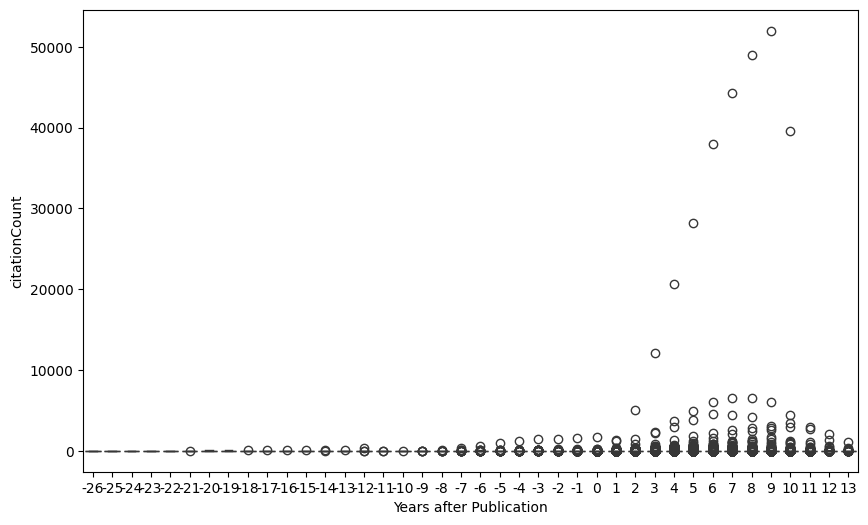

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

citations_df = pd.DataFrame(df['citations_after_years'].tolist())

# Melt the data for seaborn boxplot
citations_melted = citations_df.melt(var_name='Years after Publication', value_name='Citations')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Years after Publication', y='Citations', hue = 'Years after Publication', legend=False, data=citations_melted, palette='coolwarm')
plt.xlabel('Years after Publication')
plt.ylabel('citationCount')
plt.show()

### Invalid value in published_date, because we crawl data on multiplatforms. Reset published_year = the first year paper get cited.

In [19]:
def reset_published_year(row):
    citations = row.get("citations_by_year", {})
    if not citations:
        return row["published_date"].year

    cited_years = [int(y) for y, c in citations.items()]
    return min(cited_years)  # first year with citations

df["published_year"] = df.apply(reset_published_year, axis=1)
df['citations_after_years'] = df.apply(calculate_citations_after_years, axis=1)

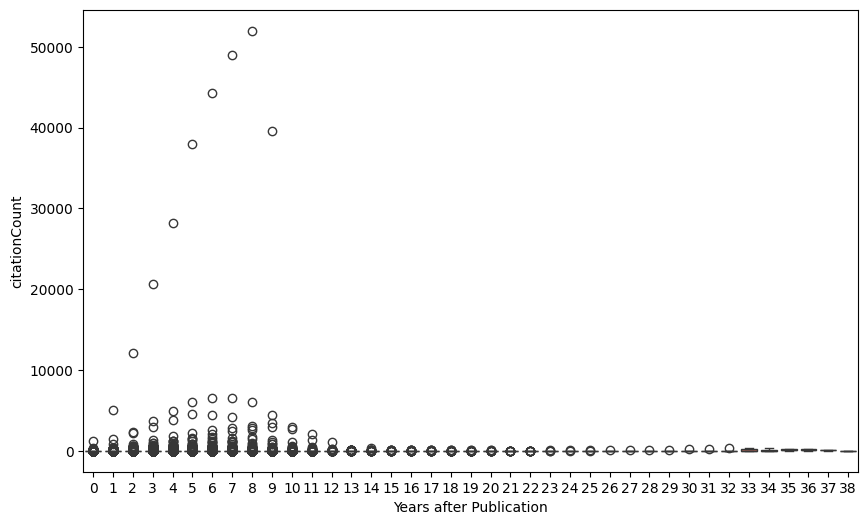

In [20]:
citations_df = pd.DataFrame(df['citations_after_years'].tolist())
citations_melted = citations_df.melt(var_name='Years after Publication', value_name='Citations')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Years after Publication', y='Citations', hue='Years after Publication', data=citations_melted, palette='coolwarm', legend=False)
plt.xlabel('Years after Publication')
plt.ylabel('citationCount')
plt.show()

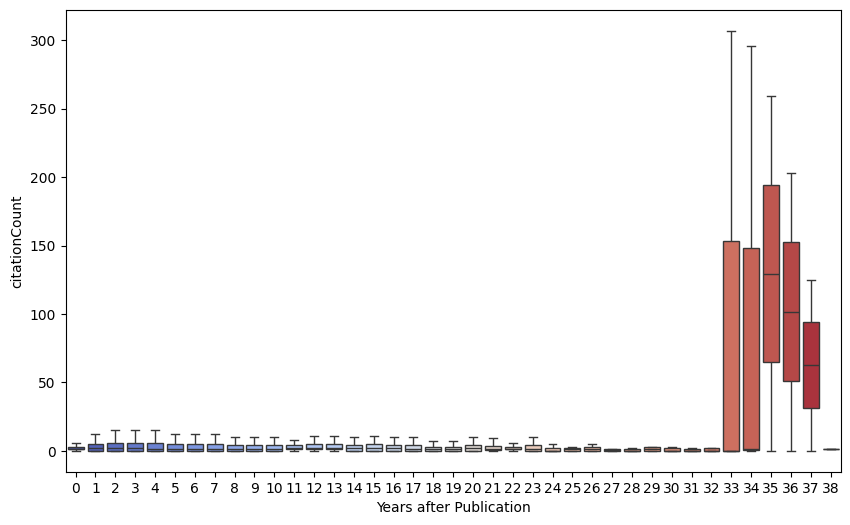

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Years after Publication', y='Citations', hue='Years after Publication', data=citations_melted, palette='coolwarm', legend=False, showfliers=False)
plt.xlabel('Years after Publication')
plt.ylabel('citationCount')
plt.show()

0–1 năm đầu: Số lượng trích dẫn trung bình rất thấp, hầu hết paper chỉ nhận được ít hơn 5 citation, và có nhiều bài chưa được trích dẫn.
→ Điều này phản ánh độ trễ tự nhiên của quá trình được cộng đồng học thuật chú ý.

2–6 năm sau khi công bố:
Đây là giai đoạn đỉnh điểm về trích dẫn — median citation tăng rõ, và xuất hiện nhiều outliers (một số paper có hơn 100, thậm chí 400 citation).
→ Đây là giai đoạn mà paper được công nhận, lan tỏa, và được tham chiếu nhiều.

Từ năm thứ 7 trở đi:
Mức citation giảm dần, median gần về 0.
→ Cho thấy các nghiên cứu hết “hot trend” hoặc bị thay thế bởi các phương pháp mới.

Có khá nhiều outliers cao: đây thường là các paper nổi bật, đột phá, có ảnh hưởng lớn trong cộng đồng CS.

CS là lĩnh vực có tốc độ đổi mới nhanh và vòng đời paper ngắn, nên việc citation giảm sau vài năm là hoàn toàn tự nhiên.
Việc có outliers cao phản ánh sự tồn tại của các bài seminal hoặc benchmark paper, thường xuất hiện trong AI, ML, hoặc Systems.

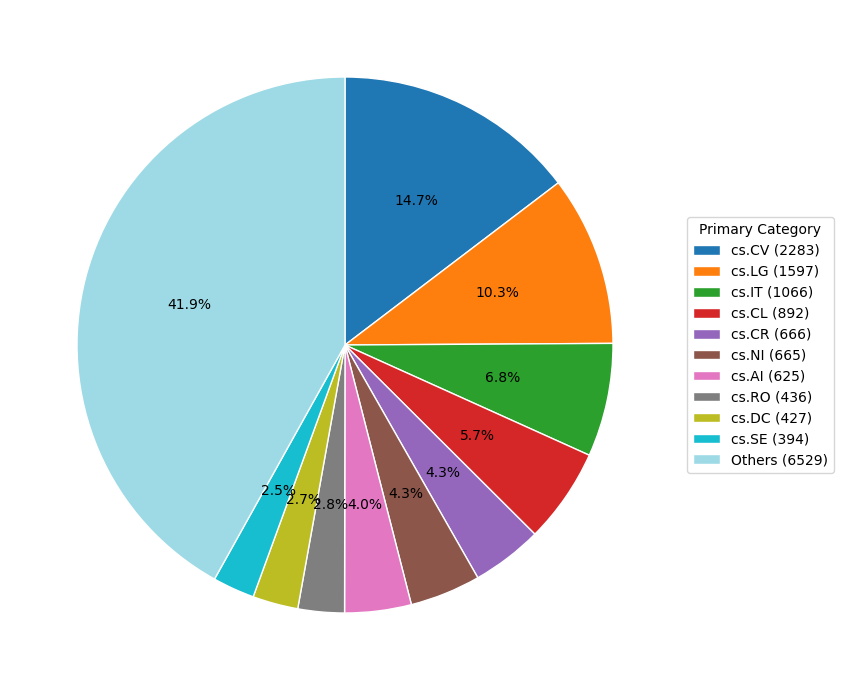

In [22]:
# Đếm số lượng bài báo theo category
category_counts = df['primary_category'].value_counts()

# Chọn top 15 categories nhiều nhất
top_n = 10
top_categories = category_counts.nlargest(top_n)

# Gom các category còn lại vào nhóm 'Others'
others_count = category_counts.iloc[top_n:].sum()

# Gộp lại thành Series mới
category_counts_modified = pd.concat([
    top_categories,
    pd.Series({'Others': others_count})
])

# Màu sắc
colors = plt.cm.tab20(np.linspace(0, 1, len(category_counts_modified)))

# Vẽ biểu đồ tròn
plt.figure(figsize=(12, 7))
wedges, texts, autotexts = plt.pie(
    category_counts_modified.values,
    labels=None,  # bỏ nhãn trực tiếp để legend rõ ràng hơn
    autopct=lambda p: f'{p:.1f}%',
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

# Thêm tiêu đề
# plt.title('Distribution of Papers by Primary Category', fontsize=14)

# Thêm legend bên phải
plt.legend(
    wedges,
    [f"{label} ({count})" for label, count in zip(category_counts_modified.index, category_counts_modified.values)],
    title="Primary Category",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.tight_layout()
plt.show()

<Axes: ylabel='primary_category'>

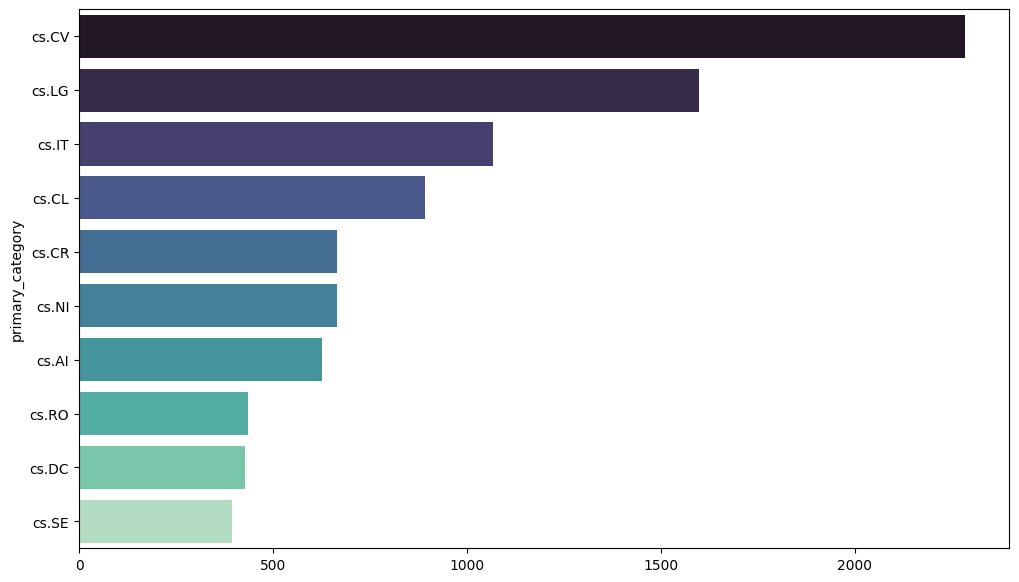

In [23]:
top_n = 10
top_categories = category_counts.head(top_n)
plt.figure(figsize=(12, 7))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='mako', hue=top_categories.index, legend=False)

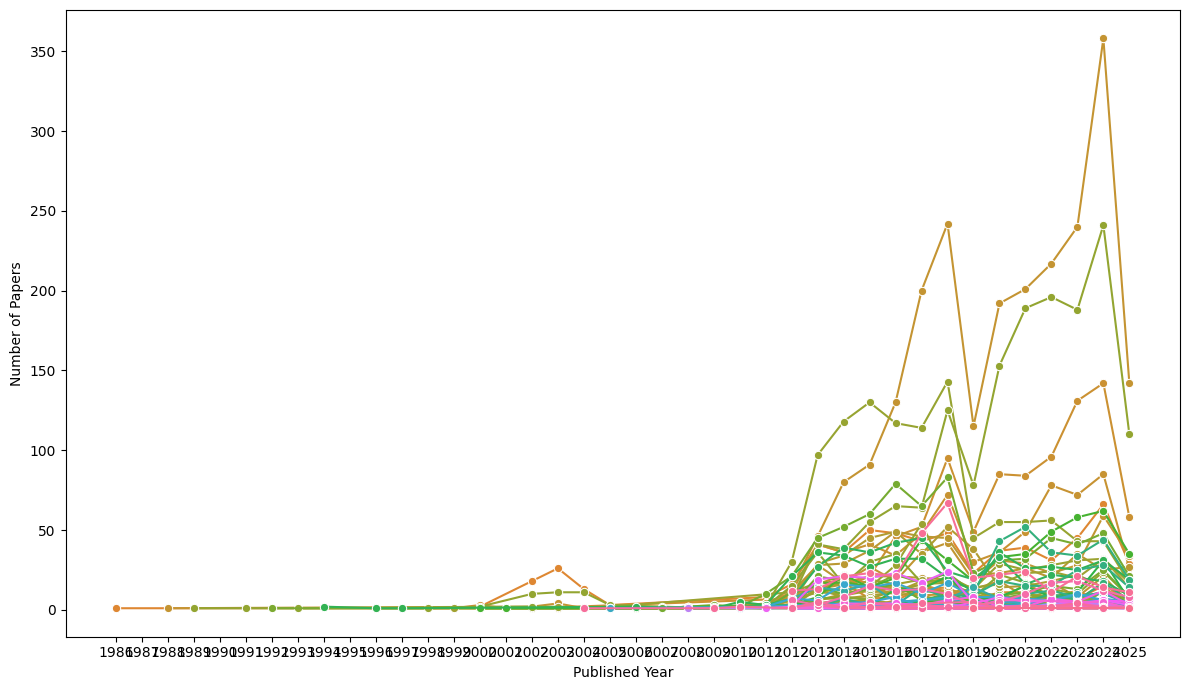

In [24]:
category_year = (
    df.groupby(['primary_category', 'published_year'])
    .size()
    .reset_index(name='count')
)

plt.figure(figsize=(12,7))
sns.lineplot(
    data=category_year,
    x='published_year',
    y='count',
    hue='primary_category',
    marker='o',
    legend=False
)

plt.xticks(range(df['published_year'].min(), df['published_year'].max()+1, 1))
plt.xlabel('Published Year')
plt.ylabel('Number of Papers')
plt.tight_layout()
plt.show()

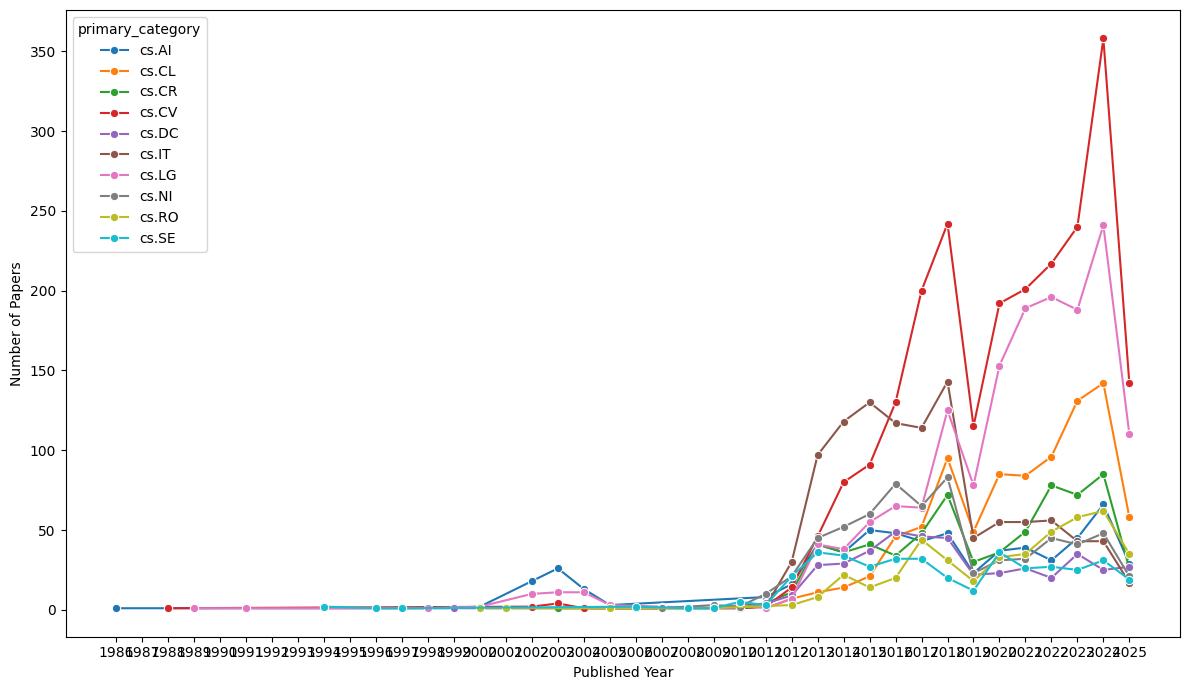

In [25]:
top_categories = df['primary_category'].value_counts().head(10).index
filtered = df[df['primary_category'].isin(top_categories)]

category_year_top = (
    filtered.groupby(['primary_category', 'published_year'])
    .size()
    .reset_index(name='count')
)

plt.figure(figsize=(12,7))
sns.lineplot(
    data=category_year_top,
    x='published_year',
    y='count',
    hue='primary_category',
    marker='o'
)
plt.xticks(range(df['published_year'].min(), df['published_year'].max()+1, 1))
plt.xlabel('Published Year')
plt.ylabel('Number of Papers')
plt.tight_layout()
plt.show()

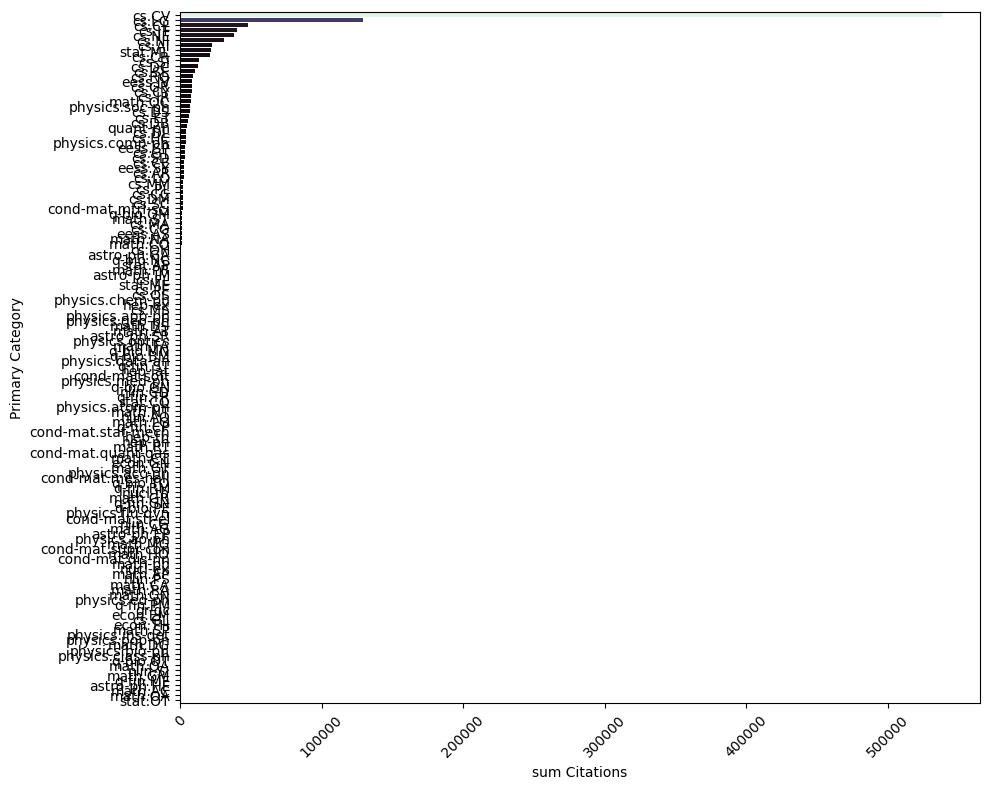

In [26]:
citations_sum = (
    df.groupby('primary_category')['citationCount']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10, 8))
sns.barplot(
    y=citations_sum.primary_category,
    x=citations_sum.citationCount,
    palette='mako',
    hue=citations_sum.citationCount,
    legend=False
)
plt.xticks(rotation=45)
plt.xlabel("sum Citations")
plt.ylabel("Primary Category")
plt.tight_layout()
plt.show()

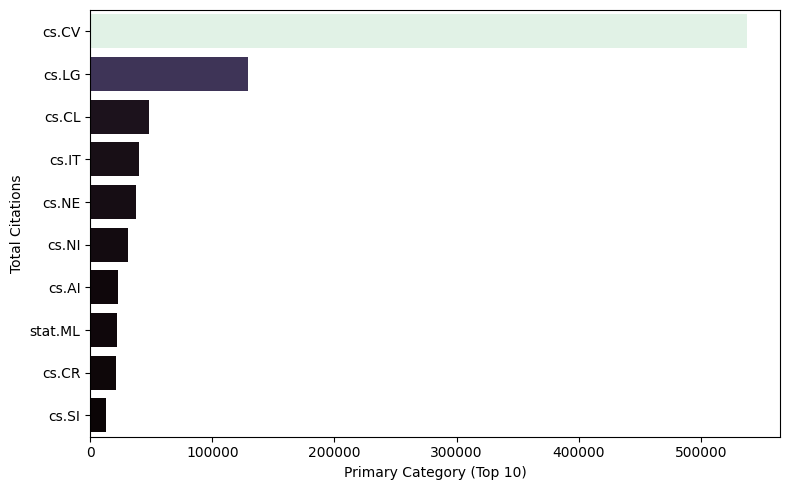

In [27]:
k = 10
top_k = citations_sum.head(k)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_k,
    y='primary_category',
    x='citationCount',
    palette='mako',
    hue='citationCount',
    legend=False,
)

plt.xlabel(f"Primary Category (Top {k})")
plt.ylabel("Total Citations")
plt.tight_layout()
plt.show()

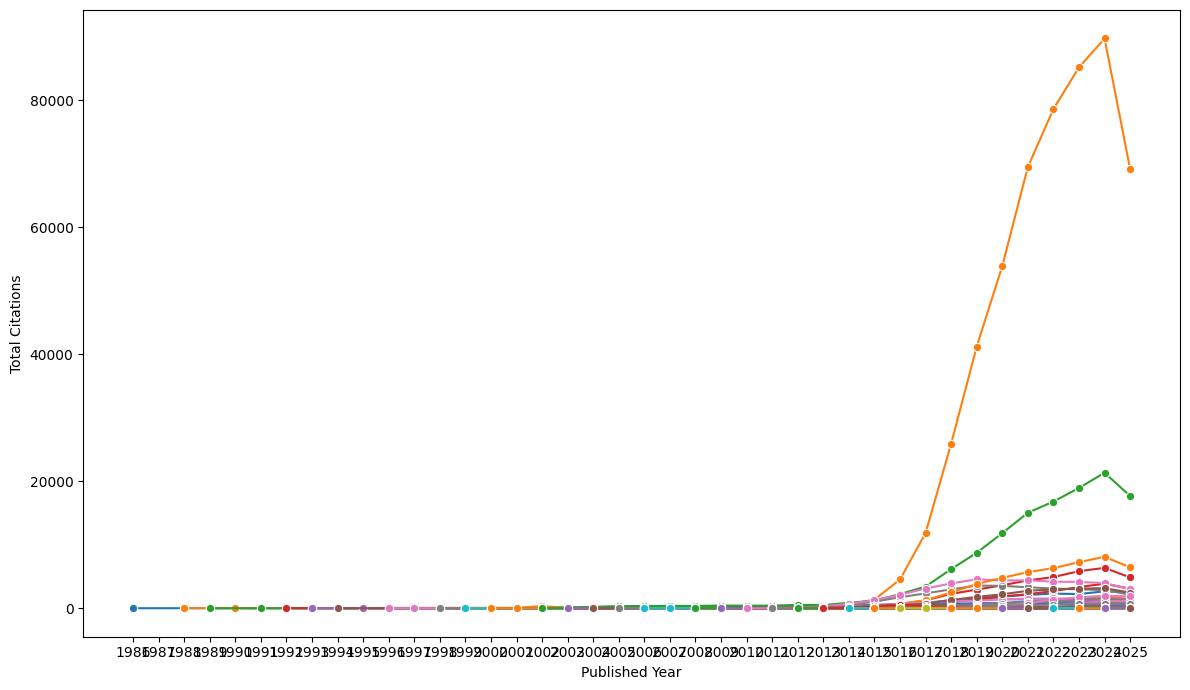

In [28]:
records = []
for _, row in df.iterrows():
    for year, count in row['citations_by_year'].items():
        records.append({
            'primary_category': row['primary_category'],
            'year': int(year),
            'citations': count
        })

citations_df = pd.DataFrame(records)

citations_sum = (
    citations_df
    .groupby(['primary_category', 'year'])['citations']
    .sum()
    .reset_index()
)

citations_sum = citations_sum.sort_values('year')

plt.figure(figsize=(12, 7))

sns.lineplot(
    data=citations_sum,
    x='year',
    y='citations',
    palette='tab10',
    hue='primary_category',
    marker='o',
    legend=False
)

plt.xticks(range(citations_sum['year'].min(), citations_sum['year'].max()+1, 1))
plt.xlabel('Published Year')
plt.ylabel('Total Citations')
plt.tight_layout()
plt.show()

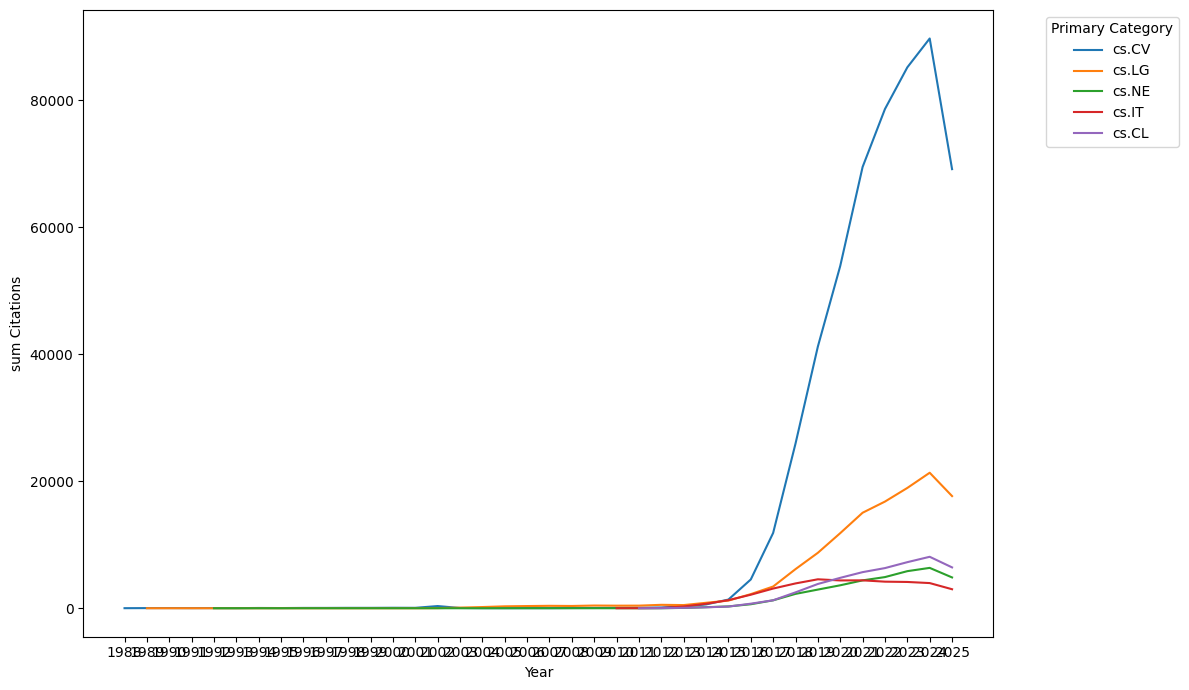

In [29]:
top_categories = (
    citations_sum.groupby('primary_category')['citations']
    .sum()
    .nlargest(5)
    .index
)
top_df = citations_sum[citations_sum['primary_category'].isin(top_categories)]
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=top_df,
    x='year',
    y='citations',
    hue='primary_category',
    palette='tab10',
)

plt.xticks(range(top_df['year'].min(), top_df['year'].max()+1, 1))
plt.xlabel('Year')
plt.ylabel('sum Citations')
plt.legend(title='Primary Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

🧩 1. Xu hướng tổng thể

Cả số lượng papers và citations đều tăng mạnh giai đoạn 2018–2021, đặc biệt đạt đỉnh vào năm 2020.

Sau đó, cả hai chỉ số đều giảm dần từ 2022 trở đi.

👉 Giải thích khả dĩ:

Giai đoạn 2020 trùng với đại dịch COVID-19, khi nhiều nhà nghiên cứu chuyển sang làm việc trực tuyến.
→ Thời gian dành cho nghiên cứu và công bố tăng mạnh.
→ Các hội nghị (như NeurIPS, ICML, CVPR, ACL, v.v.) đều chuyển sang hình thức trực tuyến, giúp việc công bố dễ dàng và nhanh hơn.

Sau 2021, khi đại dịch kết thúc, nhịp độ công bố trở lại bình thường, dẫn đến xu hướng giảm.

📚 2. Phân tích theo số lượng papers trong từng category

Các lĩnh vực cs.LG (Machine Learning) và cs.CV (Computer Vision) là hai mảng áp đảo về số lượng papers.

cs.CL (Computational Linguistics) cũng có sự tăng mạnh quanh năm 2020, có thể liên quan đến sự bùng nổ của NLP (như BERT, GPT, Transformer).

Các lĩnh vực như cs.IT và cs.CR có tốc độ tăng nhẹ hơn, cho thấy chúng ổn định hơn hoặc ít chịu tác động từ xu hướng ML bùng nổ.

📈 3. Phân tích theo tổng số citations

Từ 2019–2024, tổng citations của cs.LG và cs.CV tăng cực mạnh, đạt đỉnh khoảng 2023–2024.
→ Điều này cho thấy các paper trong hai lĩnh vực này không chỉ nhiều mà còn có ảnh hưởng cao.

cs.CL cũng có xu hướng tương tự, nhưng độ dốc thấp hơn — có thể do thời gian lan tỏa của citations trong NLP thường chậm hơn một chút.

Ngược lại, cs.IT có số citations thấp và ổn định → có thể vì đây là mảng lý thuyết, tốc độ phát triển chậm hơn và ít “trend” hơn.

📅 4. Tương quan giữa số papers và citations

Dễ thấy rằng đỉnh của citations xuất hiện trễ hơn papers khoảng 1–2 năm.
→ Đây là quy luật tự nhiên: paper cần thời gian để được đọc, trích dẫn, và lan tỏa trong cộng đồng.
→ Ví dụ: papers công bố 2020 thường đạt đỉnh citations vào 2022–2023.

We should add feature denote trending of category over time.
Because peak at 2020 of paper and 2024 of citation can be consider as anomaly, when aggregate new features, we shouldn't take this time into account.

### Effect of venue_type/venue_ranking on citationCount

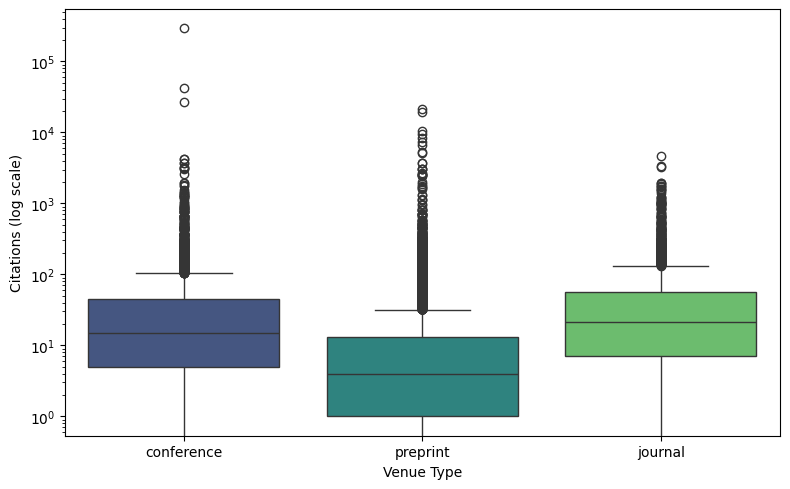

In [30]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x='venue_type',
    y='citationCount',
    palette='viridis',
    hue='venue_type',
    legend=False,
)
plt.yscale('log')  # vì citation thường lệch phải (có outliers rất lớn)
# plt.title('Citation Distribution by Venue Type')
plt.xlabel('Venue Type')
plt.ylabel('Citations (log scale)')
plt.tight_layout()
plt.show()

In [31]:
df['venue_ranking'].unique()

array(['A', 0, 'Q1', 'Q3', 'Q2', 'B', 'A*', 'C', 'Q4', 'Multiconference',
       'National:India', 'National: USA'], dtype=object)

In [32]:
def normalize_ranking(value):
    if value in ['A*', 'A', 'B', 'C']:
        return value  # CORE ranking
    elif value in ['Q1', 'Q2', 'Q3', 'Q4']:
        return value  # Scimago quartile
    # elif  in str(value):
        # return 'National'
    elif value in ['National', 'Multiconference', 'TBR']:
        return 'Other'
    elif value in ['Unranked', '-']:
        return 'Unranked'
    else:
        return 'Other'

df['venue_ranking'] = df['venue_ranking'].apply(normalize_ranking)

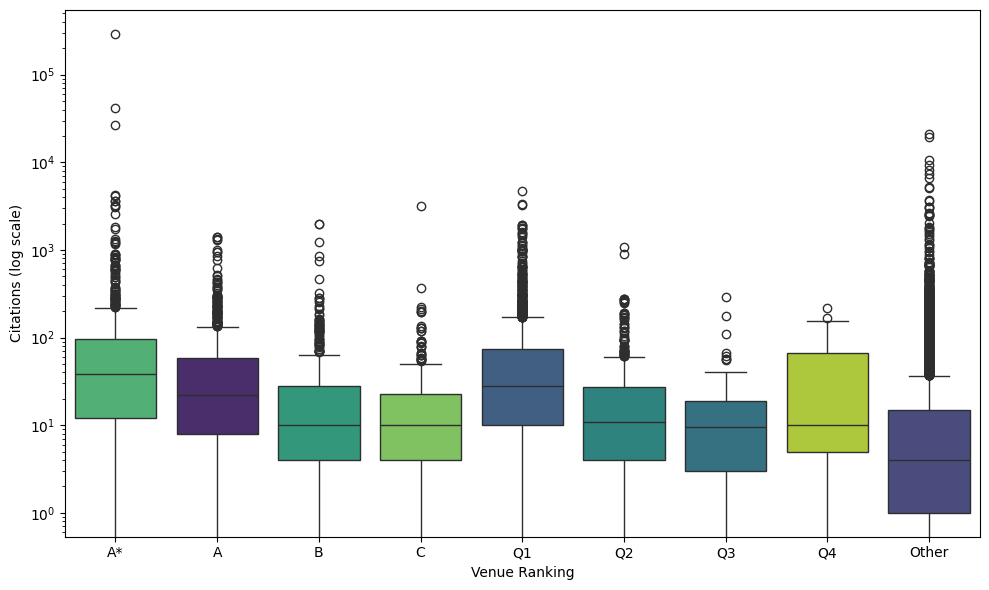

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='venue_ranking',
    y='citationCount',
    order=['A*', 'A', 'B', 'C', 'Q1', 'Q2', 'Q3', 'Q4', 'Other'],
    palette='viridis',
    hue='venue_ranking',
    legend=False
)
plt.yscale('log')
# plt.title('Citation Distribution by Normalized Venue Ranking')
plt.xlabel('Venue Ranking')
plt.ylabel('Citations (log scale)')
plt.tight_layout()
plt.show()

We observe a considerable number of high-citation outliers within the ‘Other’ category, even though this group mainly consists of preprint papers.
This likely occurs because the Semantic Scholar API has not yet updated the venue information for some papers, causing them to be classified as ‘Other’.
To mitigate this issue, we can reassign each outlier’s venue_type to the most similar or nearest median venue category based on its citation distribution.

In [34]:
# outliers = {}

# for rank in df['venue_ranking'].unique():
#     group = df[df['venue_ranking'] == rank]['citationCount']
#     if group.empty:
#         continue
#     Q1 = np.percentile(group, 25)
#     Q3 = np.percentile(group, 75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Lấy các outliers
#     outlier_values = group[(group < lower_bound) | (group > upper_bound)]
#     if len(outlier_values) > 0:
#         outliers[rank] = outlier_values.tolist()

# # In ra kết quả
# for rank, values in outliers.items():
#     if rank != 'Other':
#       continue
# #     print(f"\nOutliers in '{rank}' (count={len(values)}):")
# #     print(values[:20])  # chỉ in 20 giá trị đầu nếu quá nhiều

#     outlier_rows = df[(df['venue_ranking'] == rank) &
#                       ((df['citationCount'] < lower_bound) | (df['citationCount'] > upper_bound))]
#     print(outlier_rows[['arxiv_id', 'venue_ranking', 'citationCount']])

In [35]:
# --- Step 1: Median citation by venue (excluding 'Other')
venue_medians = (
    df[df['venue_ranking'] != 'Other']
    .groupby('venue_ranking')['citationCount']
    .median()
    .to_dict()
)

# print("Median citations by venue:")
# print(venue_medians)

# --- Step 2: Handle case when 'Other' is empty
other_group = df[df['venue_ranking'] == 'Other']
Q1 = np.percentile(other_group['citationCount'], 25)
Q3 = np.percentile(other_group['citationCount'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_other = other_group[
    (other_group['citationCount'] < lower_bound) |
    (other_group['citationCount'] > upper_bound)
]

print(f"\nDetected {len(outliers_other)} outliers in 'Other'")

# --- Step 3: Reassign nearest median
def nearest_venue(citation, medians):
    return min(medians.keys(), key=lambda k: abs(medians[k] - citation))

# df['venue_ranking_imputed'] = df['venue_ranking']

for idx, row in outliers_other.iterrows():
    nearest = nearest_venue(row['citationCount'], venue_medians)
    df.at[idx, 'venue_ranking'] = nearest

# print("\nExample of reassigned outliers:")
# print(df.loc[outliers_other.index,
#                   ['arxiv_id', 'citationCount', 'venue_ranking']].head())


Detected 1276 outliers in 'Other'


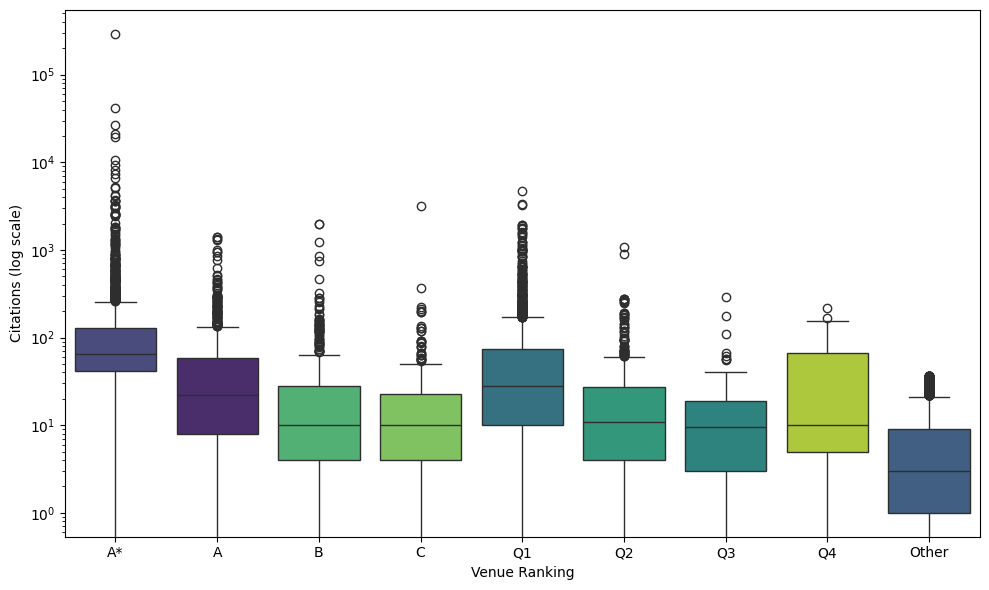

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='venue_ranking',
    y='citationCount',
    order=['A*', 'A', 'B', 'C', 'Q1', 'Q2', 'Q3', 'Q4', 'Other'],
    palette='viridis',
    hue='venue_ranking',
    legend=False
)
plt.yscale('log')
# plt.title('Citation Distribution by Normalized Venue Ranking')
plt.xlabel('Venue Ranking')
plt.ylabel('Citations (log scale)')
plt.tight_layout()
plt.show()

### num_revisions vs citations

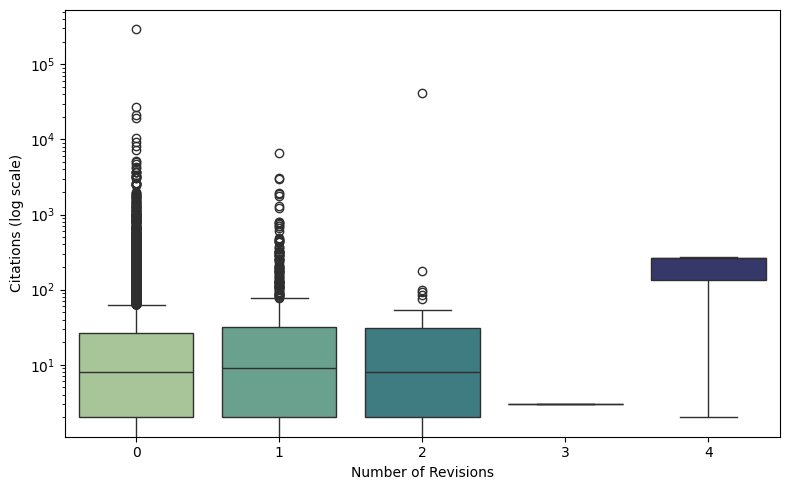

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='num_revisions',
    y='citationCount',
    palette='crest',
    hue='num_revisions',
    legend=False
)
plt.yscale('log')
# plt.title('Citation Distribution by Number of Revisions')
plt.xlabel('Number of Revisions')
plt.ylabel('Citations (log scale)')
plt.tight_layout()
plt.show()

Seem like there is no significant effect.

### Num authors vs citations

/tmp/ipykernel_20775/3596113195.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


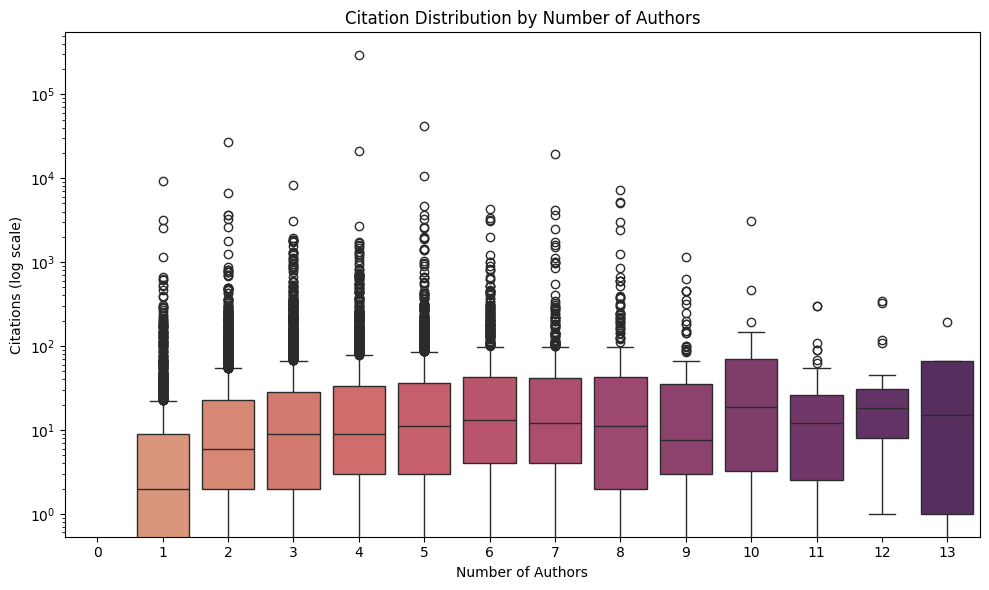

In [38]:
def count_authors(authors):
    return len(authors)

df['num_authors'] = df['authors'].apply(count_authors)
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='num_authors',
    y='citationCount',
    palette='flare'
)
plt.yscale('log')
plt.title('Citation Distribution by Number of Authors')
plt.xlabel('Number of Authors')
plt.ylabel('Citations (log scale)')
plt.tight_layout()
plt.show()

Also this.

In [39]:
import numpy as np

def extract_author_stats(authors_list):
    if not authors_list:
        return pd.Series({
            "mean_citations_all": np.nan,
            "max_citations_all": np.nan,
            "mean_h_index_all": np.nan,
            "max_h_index_all": np.nan,
            "mean_i10_index_all": np.nan,
            "max_i10_index_all": np.nan,
        })
    citations_all = [(a.get("citations_all") or 0) for a in authors_list]
    h_all = [(a.get("h_index_all") or 0) for a in authors_list]
    i10_all = [(a.get("i10_index_all") or 0) for a in authors_list]
    return pd.Series({
        "mean_citations_all": np.mean(citations_all),
        "max_citations_all": np.max(citations_all),
        "mean_h_index_all": np.mean(h_all),
        "max_h_index_all": np.max(h_all),
        "mean_i10_index_all": np.mean(i10_all),
        "max_i10_index_all": np.max(i10_all),
    })

author_features = df["authors"].apply(extract_author_stats)
df = pd.concat([df, author_features], axis=1)

### Authors' stats vs citationCount

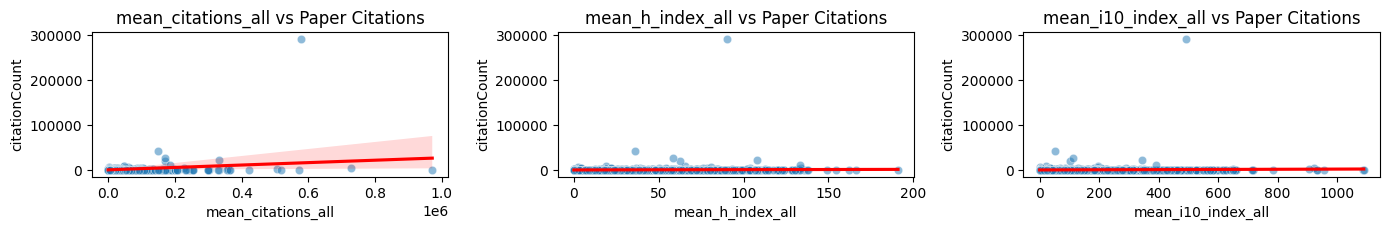

In [40]:
plt.figure(figsize=(14, 4))
# metrics = ["mean_citations_all", "max_citations_all", "mean_h_index_all", "max_h_index_all", "mean_i10_index_all", "max_i10_index_all"]
metrics = ["mean_citations_all", "mean_h_index_all", "mean_i10_index_all"]

for i, col in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=col, y="citationCount", alpha=0.5)
    sns.regplot(data=df, x=col, y="citationCount", scatter=False, color='red')
    plt.title(f"{col} vs Paper Citations")
plt.tight_layout()
plt.show()

h-index and i10-index have some impacts to citations.

### Citations and references vs citationCount

In [41]:

def extract_citation_reference_features(row):
    citations_list = row.get("citations", [])
    references_list = row.get("references", [])

    # Basic counts
    num_citations = len(citations_list)
    num_references = len(references_list)

    # Mean metrics (if data available)
    mean_ref_refcount = np.mean([r.get("referenceCount", 0) or 0 for r in references_list]) if references_list else 0
    mean_cit_citcount = np.mean([c.get("citationCount", 0) or 0 for c in citations_list]) if citations_list else 0

    return pd.Series({
        "num_citations": num_citations,
        "num_references": num_references,
        "mean_ref_refcount": mean_ref_refcount,
        "mean_cit_citcount": mean_cit_citcount
    })

# Apply extraction
features_df = df.apply(extract_citation_reference_features, axis=1)
df = pd.concat([df, features_df], axis=1)


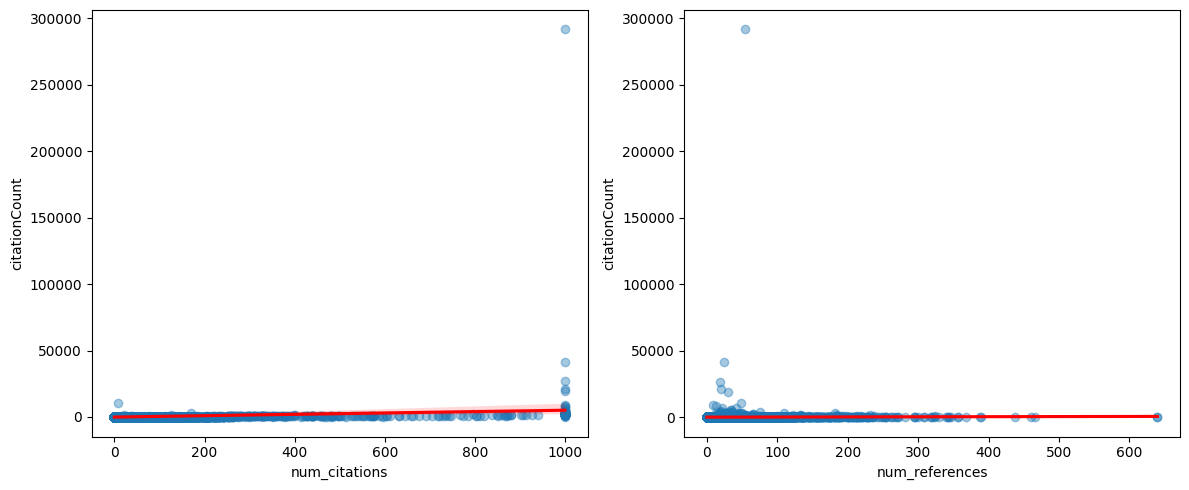

In [42]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.regplot(
    data=df,
    x="num_citations",
    y="citationCount",
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "red"}
)
# plt.title("Number of Citing Papers vs Paper Citation Count")

plt.subplot(1, 2, 2)
sns.regplot(
    data=df,
    x="num_references",
    y="citationCount",
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "red"}
)
# plt.title("Number of References vs Paper Citation Count")

plt.tight_layout()
plt.show()

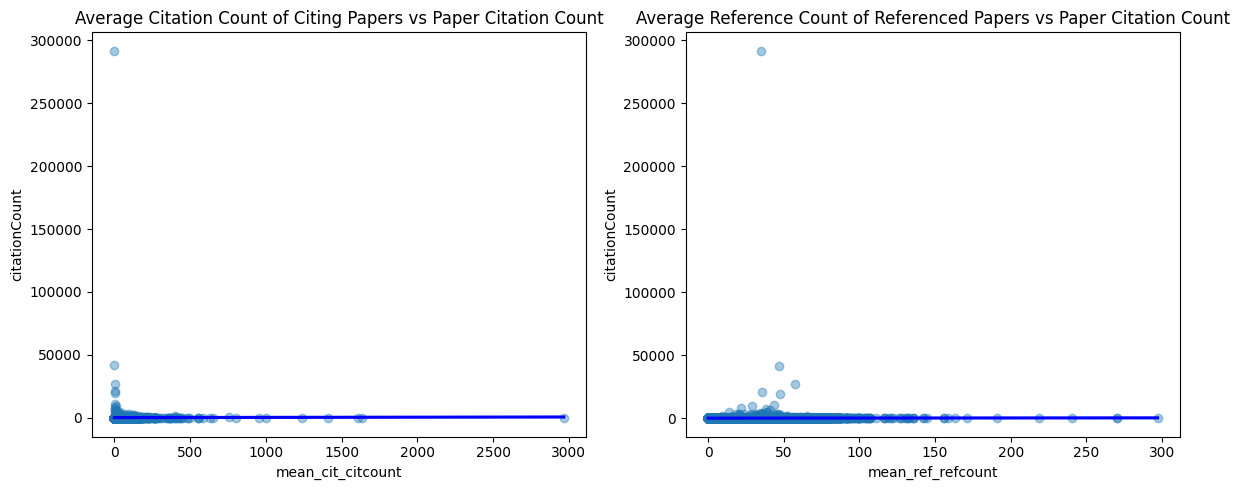

In [43]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.regplot(
    data=df,
    x="mean_cit_citcount",
    y="citationCount",
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "blue"}
)
plt.title("Average Citation Count of Citing Papers vs Paper Citation Count")

plt.subplot(1, 2, 2)
sns.regplot(
    data=df,
    x="mean_ref_refcount",
    y="citationCount",
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "blue"}
)
plt.title("Average Reference Count of Referenced Papers vs Paper Citation Count")

plt.tight_layout()
plt.show()


Citing papers have some impact, but references seem like not.

### Encoding

In [44]:
df['venue_type'] = df['venue_type'].map({'preprint':0, 'conference':1, 'journal':2})

In [45]:
df['venue_ranking'] = df['venue_ranking'].map({'Q4':1, 'Q3':2, 'Q2':3, 'Q1':4, 'A':5, 'A*':6})

### Add trend_slope for each category (based on number of papers and citations in each category over time)

We don't consider the peak time (2020-2021 in paper slope)

In [46]:
from scipy.stats import linregress

# 1️⃣ Papers per year (exclude anomaly years)
papers_trend = (
    df[(df['published_year'] < 2020) | (df['published_year'] > 2021)]
    .groupby(['primary_category', 'published_year'])
    .size()
    .reset_index(name='num_papers')
)

# 2️⃣ Citations per year (include all years)
citations_trend = (
    df.groupby(['primary_category', 'published_year'])['citationCount']
    .sum()
    .reset_index(name='total_citations')
)

# 3️⃣ Compute slope for papers (no 2020–2021)
slope_papers = (
    papers_trend.groupby('primary_category')
    .apply(lambda g: linregress(g['published_year'], g['num_papers']).slope)
    .reset_index(name='trend_slope_papers')
)

# 4️⃣ Compute slope for citations (all years)
slope_citations = (
    citations_trend.groupby('primary_category')
    .apply(lambda g: linregress(g['published_year'], g['total_citations']).slope)
    .reset_index(name='trend_slope_citations')
)

# 5️⃣ Combine results
trend_df = slope_papers.merge(slope_citations, on='primary_category', how='outer')
trend_df = trend_df.sort_values('trend_slope_citations', ascending=False)
display(trend_df)

# 6️⃣ Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=trend_df, x='primary_category', y='trend_slope_papers', color='skyblue', label='Paper trend (excl. COVID)')
sns.barplot(data=trend_df, x='primary_category', y='trend_slope_citations', color='salmon', label='Citation trend (all years)')
plt.title("Category Trend Slopes (Papers vs Citations)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'scipy'

In [ ]:
# df = pd.get_dummies(df, columns=['primary_category'])

In [ ]:
# Merge trend info back to main dataframe
df = df.merge(trend_df, on="primary_category", how="left")

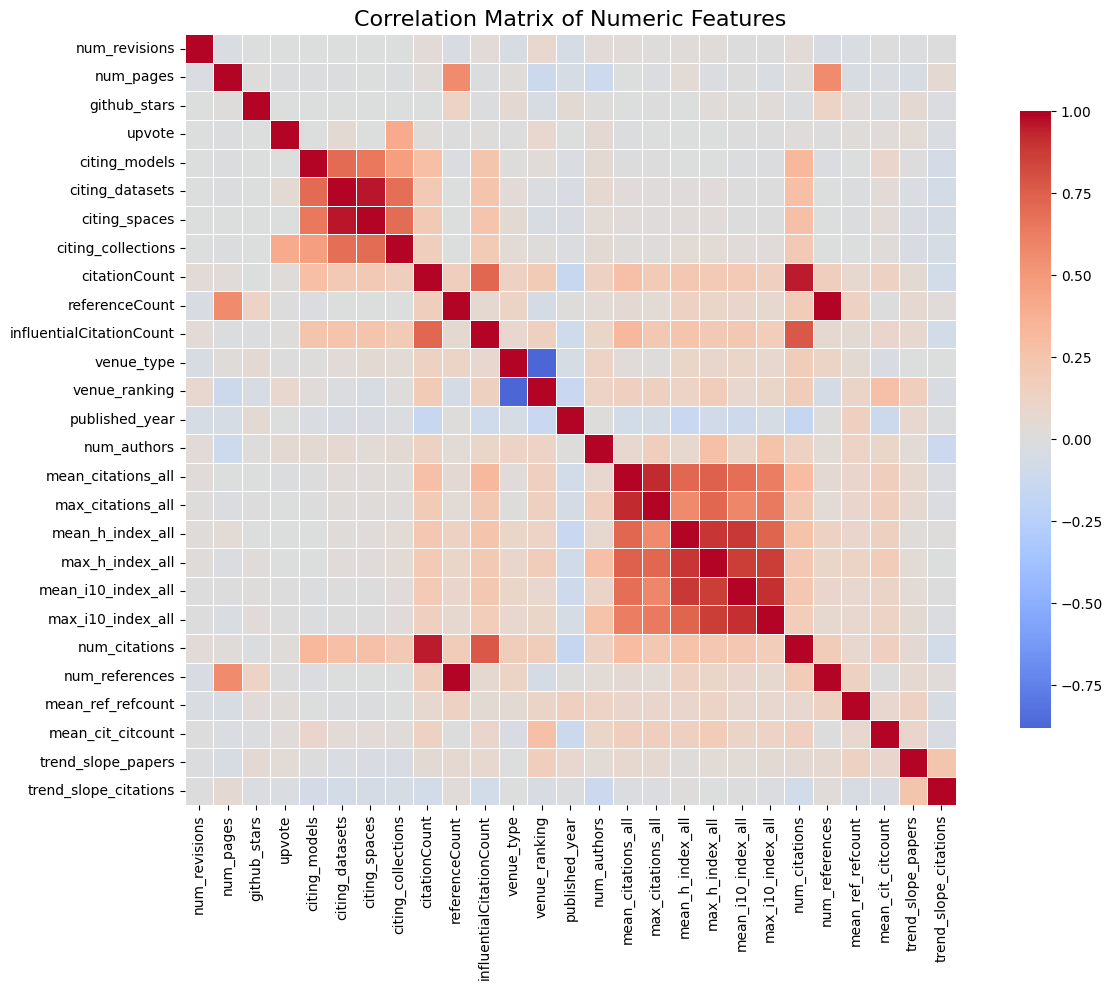

In [ ]:
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=False,  # change to True if you want numeric values on each cell
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()